In [1]:
containers_map = {
	'1': 'Can',
	'2': 'Bottle',
	'3': 'Draft',
	'4': 'Nitro',
	'5': 'Cask',
	'6': 'Crowler',
	'7': 'Growler',
	'8': 'Taster',
}

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dtypes import checkins_dtype, users_dtype
sns.set()

In [3]:
df = pd.read_csv('../data/checkins.csv', dtype=checkins_dtype)
df.shape

(3797614, 11)

In [4]:
users_df = pd.read_csv('../data/users.csv', dtype=users_dtype)
users_df.shape

(11664, 13)

In [5]:
df.isna().sum()

id                       0
created_at               0
comment            2229258
score                    0
user_name                0
beer_id                  0
brewery_id               0
language           2483637
container           588559
venue_id            844997
retail_venue_id    2184611
dtype: int64

In [6]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,id,score,beer_id
count,3797614.00,3797614.00,3797614.00
mean,1054799431.68,nan,2993322.52
std,201612143.08,0.00,1730908.60
min,160084.00,0.00,1.00
25%,965128933.00,3.50,1556949.00
50%,1121316380.00,3.75,3500303.00
75%,1206403283.00,4.25,4488904.00
max,1251397091.00,5.00,5252186.00


In [7]:
df['created_at_datetime'] = pd.to_datetime(df['created_at'], format='%a, %d %b %Y %H:%M:%S %z')
df['day_of_week'] = df.created_at_datetime.dt.day_name()
df['month'] = df.created_at_datetime.dt.month_name()
df['hour'] = df.created_at_datetime.dt.hour
df['day_of_month'] = df.created_at_datetime.dt.day

## Distribution of containers

In [8]:
container_count = df.container.value_counts()
container_count.index = container_count.index.map(lambda x: containers_map[str(int(x))])
container_count = container_count.rename_axis('container').reset_index(name='value_count')
container_count_sum = container_count.value_count.sum()
container_count.container = container_count.apply(lambda row: 'Other' if (row.value_count / container_count_sum) * 100 < 1 else row.container, axis=1)
container_count = container_count.groupby('container').agg({'value_count': 'sum'}).reset_index()
container_count

ValueError: invalid literal for int() with base 10: '1.0'

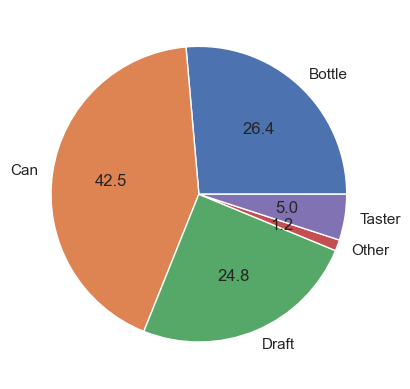

In [ ]:
plt.pie(container_count.value_count, labels=container_count.container, autopct='%.1f');

In [ ]:
df_exp = df[df.user_name.isin(users_df[users_df.total_checkins < 100].user_name)]
container_count = df_exp.container.value_counts()
container_count.index = container_count.index.map(lambda x: containers_map[str(x)])
container_count = container_count.rename_axis('container').reset_index(name='value_count')
container_count_sum = container_count.value_count.sum()
container_count.container = container_count.apply(lambda row: 'Other' if (row.value_count / container_count_sum) * 100 < 1 else row.container, axis=1)
container_count = container_count.groupby('container').agg({'value_count': 'sum'}).reset_index()
container_count

,container,value_count
0,Bottle,15574
1,Can,20914
2,Draft,9656
3,Other,151
4,Taster,655


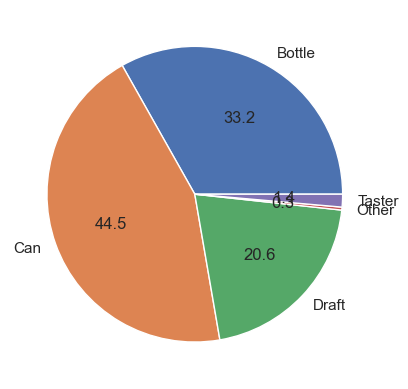

In [ ]:
plt.pie(container_count.value_count, labels=container_count.container, autopct='%.1f');

## Distribution of checkins by

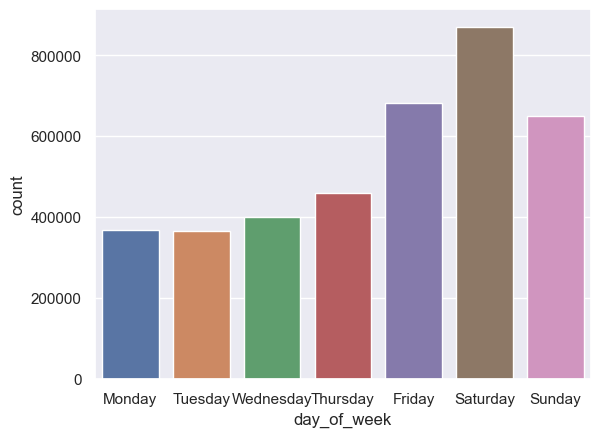

In [ ]:
weeks_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df, x='day_of_week', order=weeks_ordered);

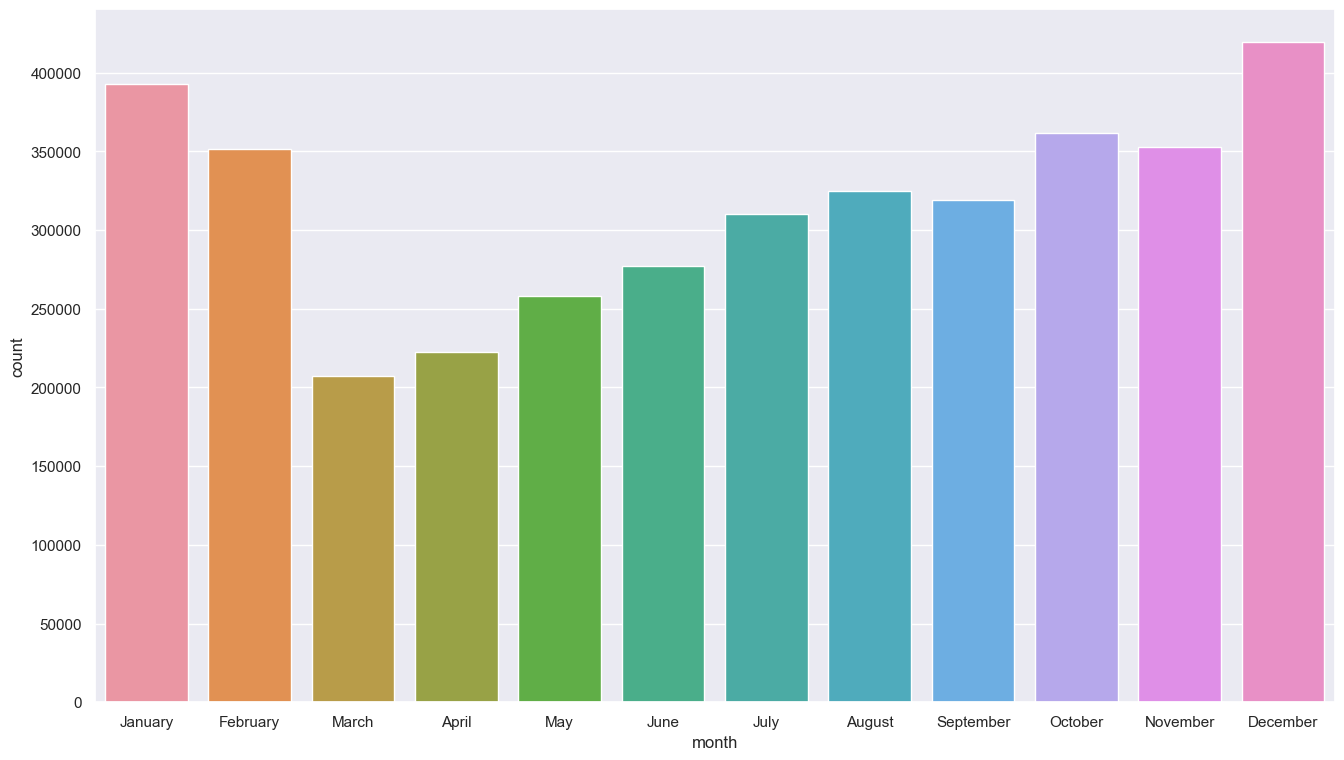

In [ ]:
plt.figure(figsize=(16,9))
months_ordered = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# sns.countplot(data=df, x='month', order=months_ordered);
sns.countplot(data=df[df.year < 2023], x='month', order=months_ordered);

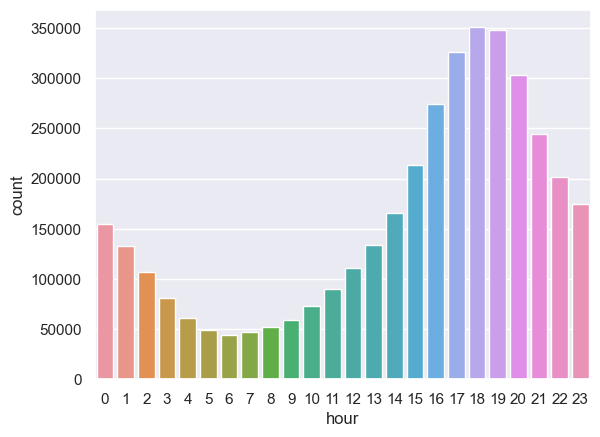

In [ ]:
sns.countplot(data=df, x='hour');

In [ ]:
Q_year_ordered = []
for year in range(2018, 2024):
    for Q in range(1, 5):
            Q_year_ordered.append(f'Q{Q}_{year}')
Q_year_ordered.pop()
Q_year_ordered.pop()
Q_year_ordered.pop()

In [ ]:
plt.figure(figsize=(10,5));
sns.countplot(data=df, x='Q_year', order=Q_year_ordered);
plt.xticks(rotation=45);